IMPORT LIBRARIES

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

IMPORT DATA

In [198]:
position_salaries = pd.read_csv("position_salaries.csv")

In [199]:
position_salaries.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [200]:
position_salaries.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [201]:
position_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [202]:
position_salaries.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<AxesSubplot:xlabel='Position'>

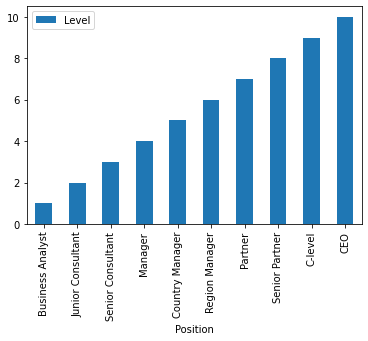

In [203]:
position_salaries.plot.bar("Position","Level")

C:\Users\Daalu\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


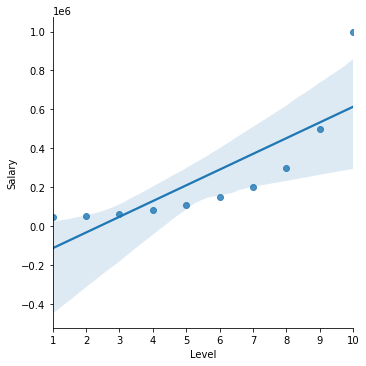

In [221]:
sns.lmplot("Level","Salary",data=position_salaries)

The above line indicates that linear regression doesn't fit all the features

CREATE TRAIN AND TEST DATA

In [204]:
X = position_salaries[["Level"]]

In [205]:
y = position_salaries["Salary"]

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [207]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [208]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [209]:
y_predict = lin_reg.predict(X_test)

In [210]:
y_predict

array([-280762.71186441, -169745.76271186,  163305.08474576,
        385338.98305085])

In [211]:
y_test

0     45000
1     50000
4    110000
6    200000
Name: Salary, dtype: int64

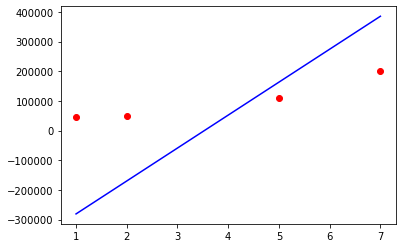

In [212]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_predict, color = 'blue')

In [213]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=11)
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)


LinearRegression()

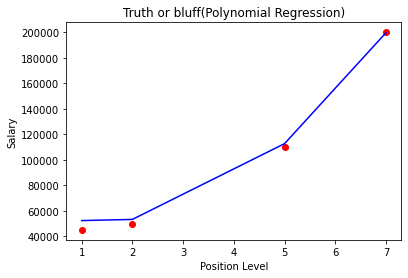

In [214]:
X_test_poly = poly_reg.fit_transform(X_test)
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,lin_reg2.predict(X_test_poly),color='blue')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [215]:
print("Polynomial Regression coef:", lin_reg2.coef_)

Polynomial Regression coef: [ 5.37159782e-08  1.22230579e-02  7.54077290e-02  3.31965219e-01
  1.19920796e+00  3.55347151e+00  7.90551047e+00  9.50762030e+00
 -5.29148732e+00  9.64847645e-01 -7.63027156e-02  2.24926544e-03]


In [217]:
print("Polinomial Regression intercept:",lin_reg2.intercept_)

Polinomial Regression intercept: 52306.90997420001


In [220]:
lin_reg2.predict( poly_reg.fit_transform(array([ [6.5] ]) ))

array([171484.67706326])